In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.formula.api as smf
import scipy
import math
import pydotplus
import graphviz
import warnings

from sklearn import ensemble, neighbors, tree, linear_model, preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.cross_decomposition import PLSRegression
from sklearn.neighbors import KNeighborsClassifier
from IPython.display import Image
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, SVR

%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
sns.set_style('white')
train = pd.read_csv('C://duh/Thinkful/Thinkful/CapstoneResearch/GeneratedAgents.csv')
predict = pd.read_csv('C://duh/Thinkful/Thinkful/CapstoneResearch/GeneratedAgentsPredict.csv')

# PCA Exploration

In [3]:
prinComp = StandardScaler().fit_transform(train.drop(['is_current_threat', 'prob_threat'], 1))
pca = PCA(.95)
pca.fit_transform(prinComp)
pca.n_components_

c:\users\lolium inter spinas\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\lolium inter spinas\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


9

# Setting Up Variables

In [4]:
train_X = train.drop(['is_current_threat', 'prob_threat'], 1)
train_Y_cat = train['is_current_threat']
train_Y_cont = train['prob_threat']

predict_X = predict.drop(['is_current_threat', 'prob_threat'], 1)

train_cat_X, test_cat_X, train_cat_Y, test_cat_Y = train_test_split(
    train_X, train_Y_cat, test_size=0.2, random_state=0)
train_cont_X, test_cont_X, train_cont_Y, test_cont_Y = train_test_split(
    train_X, train_Y_cont, test_size=0.2, random_state=0)

scaler_cat = StandardScaler()
scaler_cont = StandardScaler()
scaler_cat.fit(train_cat_X)
scaler_cont.fit(train_cont_X)

train_cat_X = scaler_cat.transform(train_cat_X)
test_cat_X = scaler_cat.transform(test_cat_X)
train_cont_X = scaler_cont.transform(train_cont_X)
test_cont_X = scaler_cont.transform(test_cont_X)

predict_X = scaler_cont.transform(predict_X)

c:\users\lolium inter spinas\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\lolium inter spinas\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\lolium inter spinas\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:17: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
c:\users\lolium inter spinas\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:18: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
c:\users\lolium inter 

# Naive Bayes

In [5]:
bnb = BernoulliNB()

print('With 20% Holdout: ' + str(bnb.fit(train_cat_X, train_cat_Y).score(test_cat_X, test_cat_Y)))
print('R^2 Score: ' + str(bnb.fit(train_X, train_Y_cat).score(train_X, train_Y_cat)))
print('Cross Validation:\n',cross_val_score(bnb, train_X, train_Y_cat, cv=10))

With 20% Holdout: 0.9725
R^2 Score: 0.9664
Cross Validation:
 [0.96603397 0.96603397 0.96603397 0.96603397 0.966      0.966
 0.96696697 0.96696697 0.96696697 0.96696697]


# Linear Regression

In [6]:
lin_regr = linear_model.LinearRegression()

print('With 20% Holdout: ' + str(lin_regr.fit(train_cont_X, train_cont_Y).score(test_cont_X, test_cont_Y)))
print('R^2 score:', lin_regr.fit(train_X, train_Y_cont).score(train_X, train_Y_cont))
print('Cross Validation:\n', cross_val_score(lin_regr, train_X, train_Y_cont, cv=10))

With 20% Holdout: 0.004483475047093899
R^2 score: 0.019886101991304805
Cross Validation:
 [0.02591873 0.01633583 0.00466068 0.01816578 0.00840217 0.01522338
 0.00367969 0.0280716  0.02558129 0.02009062]


# K-Nearest Neighbor Classifier; k=5, weighted

In [7]:
knn_class = neighbors.KNeighborsClassifier(n_neighbors = 5, weights='distance')

print('With 20% Holdout: ' + str(knn_class.fit(train_cat_X, train_cat_Y).score(test_cat_X, test_cat_Y)))
print('R^2 Score: ' + str(knn_class.fit(train_X, train_Y_cat).score(train_X, train_Y_cat)))
print('Cross Validation:\n', cross_val_score(knn_class, train_X, train_Y_cat, cv=10))

With 20% Holdout: 0.9775
R^2 Score: 1.0
Cross Validation:
 [0.96803197 0.97402597 0.97102897 0.96703297 0.966      0.966
 0.96996997 0.97097097 0.96996997 0.96796797]


# K-Nearest Neighbor Regression, k=5 weighted

In [8]:
knn_regr = neighbors.KNeighborsRegressor(n_neighbors=5, weights='distance')

print('With 20% Holdout: ' + str(knn_regr.fit(train_cont_X, train_cont_Y).score(test_cont_X, test_cont_Y)))
print('R^2 Score: ' + str(knn_regr.fit(train_X, train_Y_cont).score(train_X, train_Y_cont)))
print('Cross Validation:\n', cross_val_score(knn_regr, train_X, train_Y_cont, cv=10))

With 20% Holdout: -0.17151764031575123
R^2 Score: 1.0
Cross Validation:
 [-0.16395677 -0.20096392 -0.20140818 -0.24242451 -0.18488396 -0.1538096
 -0.1468984  -0.15013981 -0.16456269 -0.15953788]


# Decision Tree Classifier, max_features=3, max_depth=5

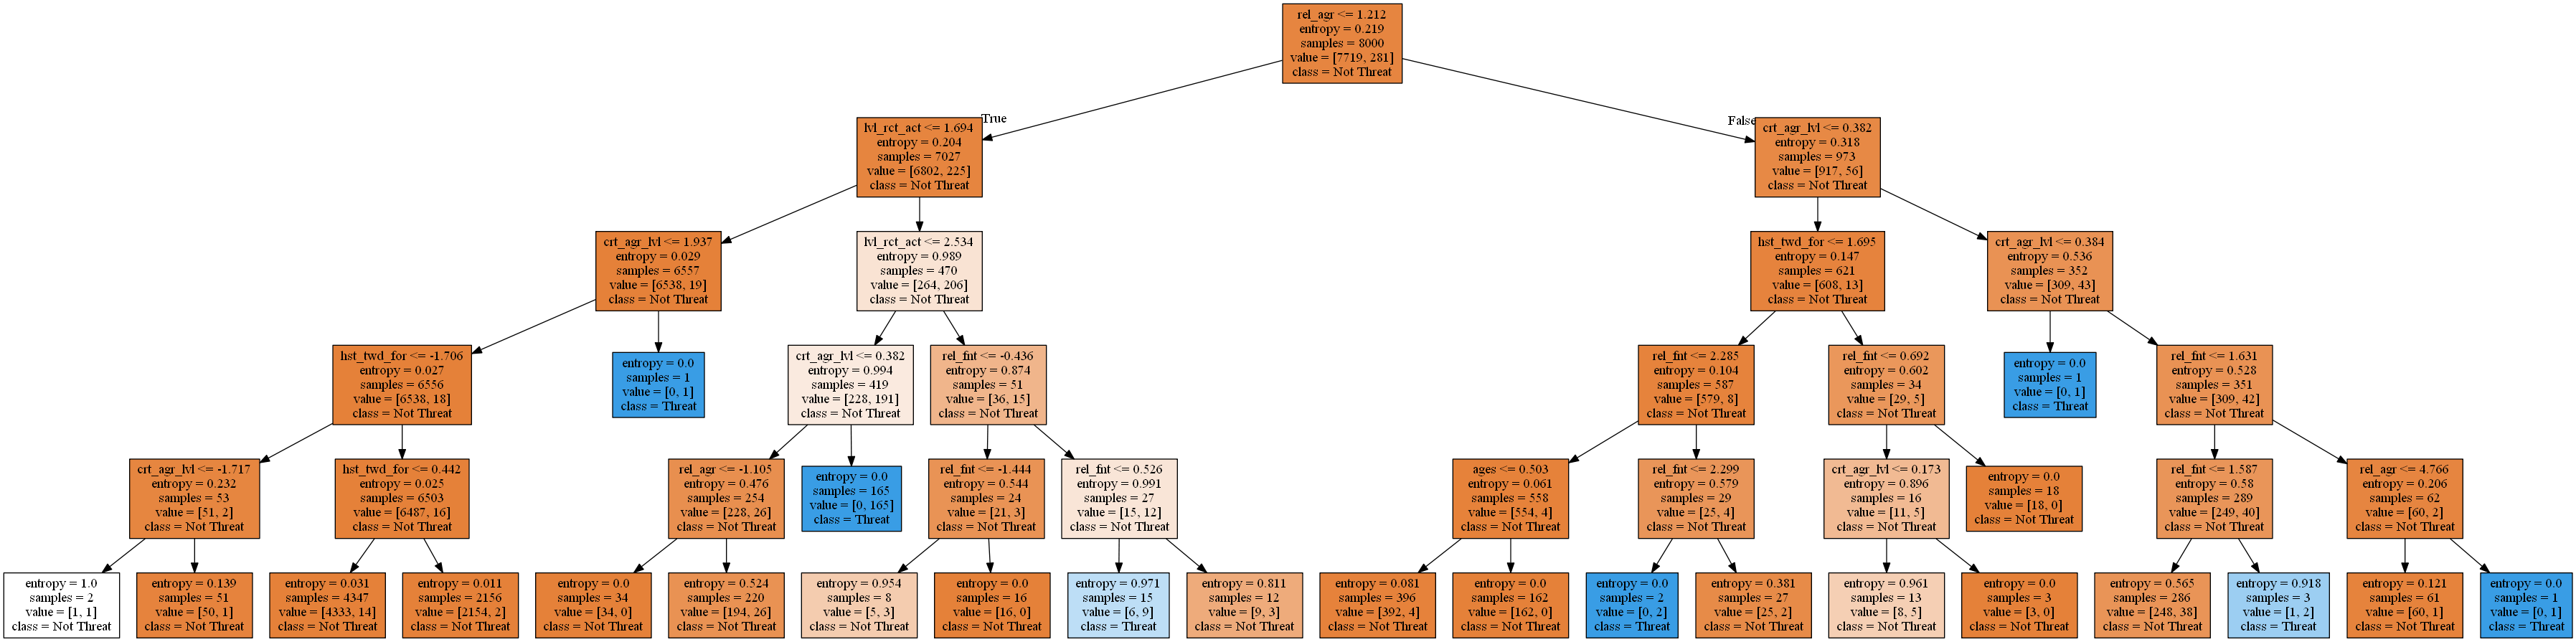

In [9]:
class_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=3,
    max_depth=5
)

class_tree.fit(train_cat_X, train_cat_Y)

dot_data = tree.export_graphviz(
    class_tree, out_file=None,
    feature_names=train_X.columns,
    class_names=['Not Threat', 'Threat'],
    filled=True,
)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [10]:
print('With 20% Holdout: ' + str(class_tree.fit(train_cat_X, train_cat_Y).score(test_cat_X, test_cat_Y)))
print('R^2 Score: ' + str(class_tree.fit(train_X, train_Y_cat).score(train_X, train_Y_cat)))
print('Cross Validation:\n', cross_val_score(class_tree, train_X, train_Y_cat, cv=10))

With 20% Holdout: 0.9745
R^2 Score: 0.9796
Cross Validation:
 [0.98001998 0.96903097 0.97202797 0.997003   0.978      0.993
 0.99299299 0.99399399 0.99199199 0.97597598]


# Decision Tree Regression, max_depth=5

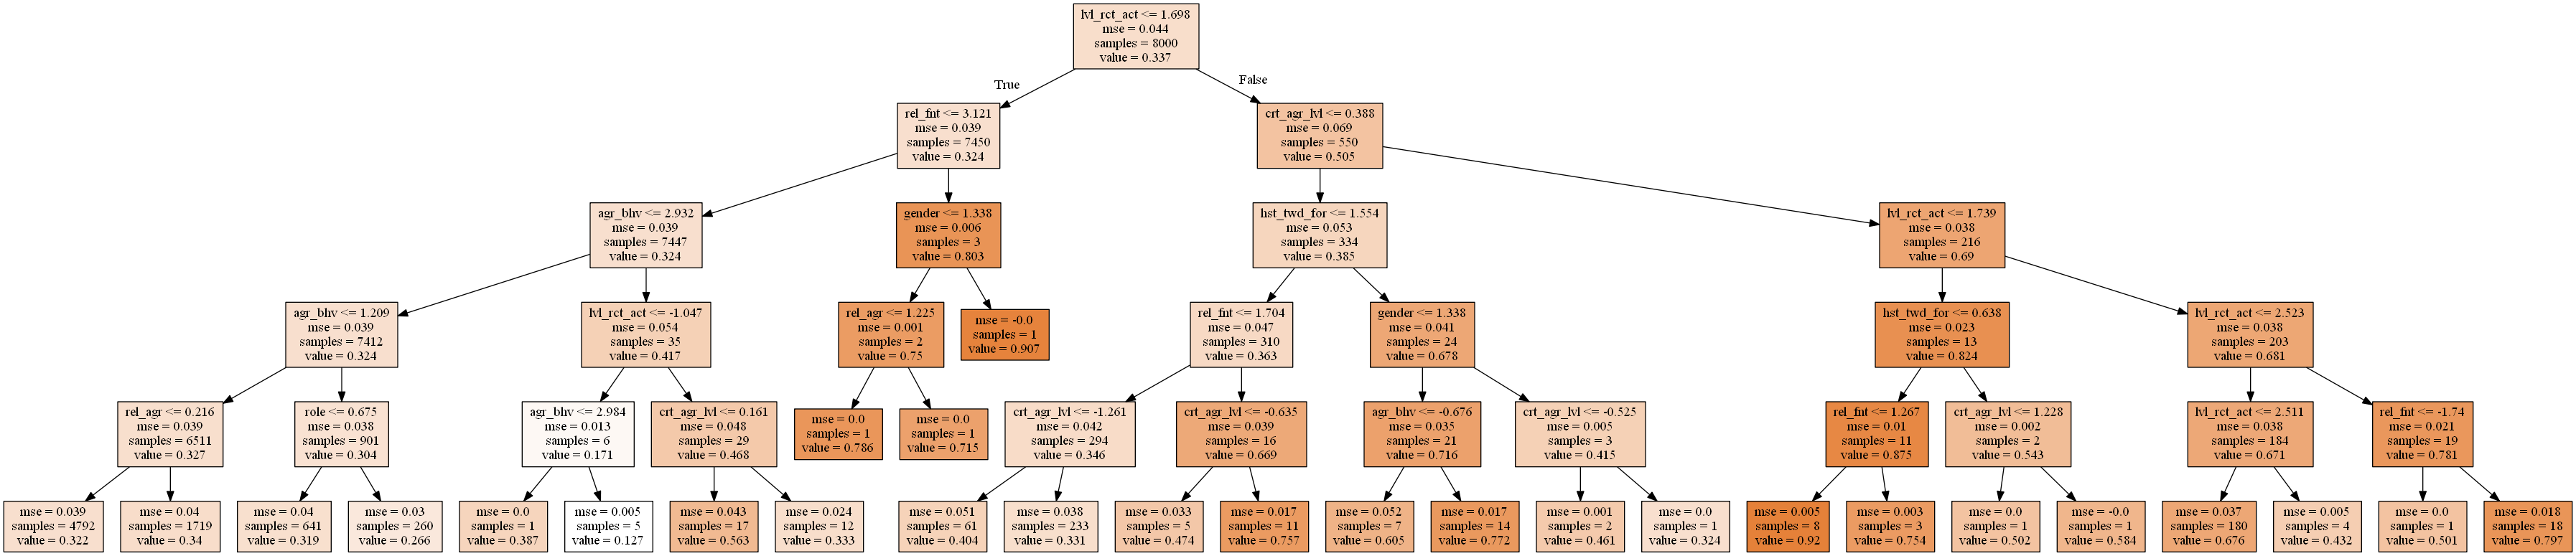

In [11]:
regr_tree = tree.DecisionTreeRegressor(max_depth=5)
regr_tree.fit(train_cont_X, train_cont_Y)

dot_data = tree.export_graphviz(
    regr_tree, out_file=None,
    feature_names=train_X.columns,
    class_names=['Not Threat', 'Threat'],
    filled=True,
)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [12]:
print('With 20% Holdout: ' + str(regr_tree.fit(train_cont_X, train_cont_Y).score(test_cont_X, test_cont_Y)))
print('R^2:\n', regr_tree.fit(train_X, train_Y_cont).score(train_X, train_Y_cont))
print('Cross Validation:\n', cross_val_score(regr_tree, train_X, train_Y_cont, cv=10))

With 20% Holdout: 0.05075763520160991
R^2:
 0.1014654593119837
Cross Validation:
 [0.09333141 0.10543539 0.04400473 0.02434044 0.06851894 0.11009659
 0.05097376 0.06323889 0.10342114 0.06305531]


# Random Forest Classifier

In [13]:
rfc = ensemble.RandomForestClassifier()

print('With 20% Holdout: ' + str(rfc.fit(train_cat_X, train_cat_Y).score(test_cat_X, test_cat_Y)))
print('R^2 Score: ' + str(rfc.fit(train_X, train_Y_cat).score(train_X, train_Y_cat)))
print('Cross Validation:\n', cross_val_score(rfc, train_X, train_Y_cat, cv=10))

With 20% Holdout: 0.9965
R^2 Score: 0.9991
Cross Validation:
 [0.99200799 0.995005   0.996004   0.997003   0.998      0.998
 0.996997   0.99499499 0.997998   0.996997  ]


# Random Forest Regression

In [14]:
rfg = ensemble.RandomForestRegressor()

print('With 20% Holdout: ' + str(rfg.fit(train_cont_X, train_cont_Y).score(test_cont_X, test_cont_Y)))
print('R^2 Score: ' + str(rfg.fit(train_X, train_Y_cont).score(train_X, train_Y_cont)))
print('Cross Validation:\n', cross_val_score(rfg, train_X, train_Y_cont, cv=10))

With 20% Holdout: -0.0797324257402463
R^2 Score: 0.8160022056218587
Cross Validation:
 [-0.02865044 -0.01914225 -0.13264407 -0.16213776 -0.06984511 -0.01946664
 -0.04286206 -0.0454441   0.00722935 -0.03833215]


# Logistic Regression

In [15]:
lr = LogisticRegression(C=1e9)

print('With 20% Holdout: ' + str(lr.fit(train_cat_X, train_cat_Y).score(test_cat_X, test_cat_Y)))
print('R^2 Score:\n', lr.fit(train_X, train_Y_cat).score(train_X, train_Y_cat))
print('Cross Validation:\n', cross_val_score(lr, train_X, train_Y_cat, cv=10))

With 20% Holdout: 0.986
R^2 Score:
 0.9803
Cross Validation:
 [0.98001998 0.97802198 0.98401598 0.97802198 0.98       0.977
 0.97897898 0.98198198 0.98098098 0.97997998]


# Ridge Regression, alpha=10

In [16]:
ridgeregr = linear_model.Ridge(alpha=10, fit_intercept=False)

print('With 20% Holdout: ' + str(ridgeregr.fit(train_cat_X, train_cat_Y).score(test_cat_X, test_cat_Y)))
print('R^2 Score:\n', ridgeregr.fit(train_X, train_Y_cat).score(train_X, train_Y_cat))
print('Cross Validation:\n', cross_val_score(ridgeregr, train_X, train_Y_cat, cv=10))

With 20% Holdout: 0.08066503556573212
R^2 Score:
 0.14741336406820815
Cross Validation:
 [0.12498456 0.17465443 0.12335859 0.05978501 0.18215429 0.16865511
 0.11003846 0.11672784 0.16542508 0.14432124]


# Lasso Regression, alpha=.35

In [17]:
lassoregr = linear_model.Lasso(alpha=.35)

print('With 20% Holdout: ' + str(lassoregr.fit(train_cat_X, train_cat_Y).score(test_cat_X, test_cat_Y)))
print('R^2 Score:\n', lassoregr.fit(train_X, train_Y_cat).score(train_X, train_Y_cat))
print('Cross Validation:\n', cross_val_score(lassoregr, train_X, train_Y_cat, cv=10))

With 20% Holdout: -0.0021739892498244817
R^2 Score:
 0.0
Cross Validation:
 [-4.00538995e-04 -5.60224090e-03 -9.27712518e-04 -9.53353762e-03
 -4.00538995e-04 -2.04907535e-04 -2.04703962e-03 -2.77828124e-04
 -4.00538995e-04 -1.39276251e-05]


# Support Vector Classifier, kernal=linear

In [18]:
svm = SVC(kernel = 'linear')

print('With 20% Holdout: ' + str(svm.fit(train_cat_X, train_cat_Y).score(test_cat_X, test_cat_Y)))
print('R^2 Score: ' + str(svm.fit(train_X, train_Y_cat).score(train_X, train_Y_cat)))
print('Cross Validation:\n', cross_val_score(svm, train_X, train_Y_cat, cv=10))

With 20% Holdout: 0.9865
R^2 Score: 0.9796
Cross Validation:
 [0.97902098 0.98001998 0.98201798 0.97502498 0.978      0.977
 0.97897898 0.97997998 0.97997998 0.97797798]


# Support Vector Regression, gamma=auto

In [19]:
svr = SVR(gamma='auto')

print('With 20% Holdout: ' + str(svr.fit(train_cont_X, train_cont_Y).score(test_cont_X, test_cont_Y)))
print('R^2 Score: ' + str(svr.fit(train_X, train_Y_cont).score(train_X, train_Y_cont)))
print('Cross Validation:\n', cross_val_score(svr, train_X, train_Y_cont, cv=10))

With 20% Holdout: -0.03556745791843885
R^2 Score: 0.05997992589600909
Cross Validation:
 [-0.0024718   0.01958788 -0.02436328 -0.03159132 -0.02071787  0.00224841
 -0.01159884  0.01918236 -0.00185476  0.01091079]


# Boosted Classifier; loss=deviance, n_estimators=500, max_depth=5

In [20]:
params = {'loss': 'deviance', 'n_estimators':500, 'max_depth':10}

clf = ensemble.GradientBoostingClassifier(**params)

print('With 20% Holdout: ' + str(clf.fit(train_cat_X, train_cat_Y).score(test_cat_X, test_cat_Y)))
print('R^2 Score: ' + str(clf.fit(train_X, train_Y_cat).score(train_X, train_Y_cat)))
print('Cross Validation:\n', cross_val_score(clf, train_X, train_Y_cat, cv=10))

With 20% Holdout: 0.997
R^2 Score: 1.0
Cross Validation:
 [0.99400599 0.997003   0.995005   0.996004   0.998      0.998
 0.996997   0.99499499 0.997998   0.997998  ]


# Boosted Regression; loss=ls, learning_rate=.1, n_estimators=500, max_depth=10

In [21]:
params = {'loss': 'ls', 'learning_rate': .1, 'n_estimators': 500, 'max_depth': 10}

regr = ensemble.GradientBoostingRegressor(**params)

print('With 20% Holdout: ' + str(regr.fit(train_cont_X, train_cont_Y).score(test_cont_X, test_cont_Y)))
print('R^2 Score: ' + str(regr.fit(train_X, train_Y_cont).score(train_X, train_Y_cont)))
print('Cross Validation:\n', cross_val_score(regr, train_X, train_Y_cont, cv=10))

With 20% Holdout: -0.07718296264040059
R^2 Score: 0.9824627383229736
Cross Validation:
 [-0.05592862 -0.04214797 -0.05938028 -0.08550747 -0.09665939 -0.01132761
 -0.09604817 -0.09256764 -0.0101589  -0.01971082]


In [22]:
predict['prob_threat'] = regr.predict(predict_X)
predict['is_current_threat'] = clf.predict(predict_X)
predict['prob_threat'] = knn_regr.predict(predict_X)

[]

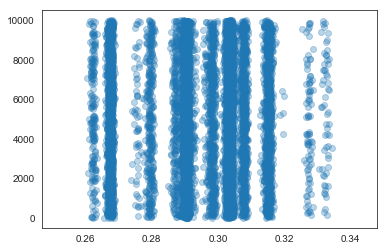

In [23]:
plt.scatter(predict['prob_threat'], predict.index, alpha=.3)
plt.plot()

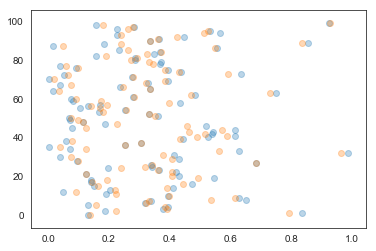

In [24]:
plt.scatter(train['prob_threat'][:100], train.index[:100], alpha = .3)
plt.scatter(regr.predict(train_X)[:100], train.index[:100], alpha = .3)
plt.show()

In [25]:
predict['prob_threat'].describe()

count   10000.000
mean        0.294
std         0.015
min         0.260
25%         0.290
50%         0.297
75%         0.304
max         0.334
Name: prob_threat, dtype: float64